<br><br><font size=6><b>Advanced</b> Transformations

<font size=3><ul><li>Suganthan Thamotharampillai
<br><li>02.08.2023

<br><font size=5><b>Imports

In [2]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, json

<br><font size=5><b>Data

In [489]:
# SUPERHEROES Dataset from Kaggle
superhero_info  = pd.read_csv("Data/superhero_info.csv")
superhero_power = pd.read_csv("Data/superhero_powers.csv")
df = superhero_info

<br><font size=5><b>Dataframe</b> Overview

In [490]:
# Data Display
display(superhero_info)
display(superhero_power)

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"
...,...,...,...,...,...,...,...,...
458,Yellowjacket|Marvel Comics,Male,Human,good,Blond,blue,Unknown,"{'Height': '183.0 cm', 'Weight': '83.0 kg'}"
459,Yellowjacket II|Marvel Comics,Female,Human,good,Strawberry Blond,blue,Unknown,"{'Height': '165.0 cm', 'Weight': '52.0 kg'}"
460,Yoda|George Lucas,Male,Yoda's species,good,White,brown,green,"{'Height': '66.0 cm', 'Weight': '17.0 kg'}"
461,Zatanna|DC Comics,Female,Human,good,Black,blue,Unknown,"{'Height': '170.0 cm', 'Weight': '57.0 kg'}"


,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."
...,...,...
662,Yellowjacket II,"Flight,Energy Blasts,Size Changing"
663,Ymir,"Cold Resistance,Durability,Longevity,Super Str..."
664,Yoda,"Agility,Stealth,Danger Sense,Marksmanship,Weap..."
665,Zatanna,"Cryokinesis,Telepathy,Magic,Fire Control,Proba..."


<br><br><br><font size=6><b>Advanced</b> Transformations

<font style="font-size:16px"><b>TRANSFORMATIONS</b></font><br>
<font style="font-size:15px">
    <ol>
        <li>Hero|Publisher string column will be separated into individual respective columns</li>
        <li>Measurements column:</li>
            <ul>
                <li>String column will be converted to dictionary</li>
                <li>Dictionary will be unpacked into separate columns</li>
                <li>Separated columns will be changed to respective data types</li>
            </ul>
        <li>3. Powers column will be one-hot-encoded</li>
    </ol>

<br><br><b>1. Hero|Publisher string column to be separated into individual respective columns

In [491]:
# Exploring existing format
df[['Hero|Publisher']].head(2)

,Hero|Publisher
0,A-Bomb|Marvel Comics
1,Abe Sapien|Dark Horse Comics


In [492]:
# Splitting & Expanding
display(df['Hero|Publisher'].str.split('|', expand=True).head(2))
df[['Hero','Publisher']] = df['Hero|Publisher'].str.split('|', expand=True);dff.head(2)

,0,1
0,A-Bomb,Marvel Comics
1,Abe Sapien,Dark Horse Comics


,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics


In [493]:
# REARRAGEMENTS
df = pd.concat([df[['Hero','Publisher']], df[df.columns[~df.columns.isin(['Hero','Publisher','Hero|Publisher'])]]] ,axis=1);df.head()

,Hero,Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb,Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien,Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur,DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination,Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man,Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


<br><b>2a. Measurements string column will be converted to dictionary

In [494]:
# Examine single Value
display(type(df['Measurements'][0]), df['Measurements'][0])

str

"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"

In [495]:
# Change all values
# Replace Strings
df['Measurements'] = df['Measurements'].str.replace("'",'"')

# Apply json.loads
df['Measurements'] = df['Measurements'].apply(json.loads)

In [496]:
# Check Value
display(type(df['Measurements'][0]), df['Measurements'][0])

dict

{'Height': '203.0 cm', 'Weight': '441.0 kg'}

<br><b>2b. Dictionary will be unpacked into separate columns

In [497]:
df = pd.concat((df[df.columns[~df.columns.isin(['Measurements'])]], df['Measurements'].apply(pd.Series)), axis = 1);df.head()

,Hero,Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Height,Weight
0,A-Bomb,Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,203.0 cm,441.0 kg
1,Abe Sapien,Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,191.0 cm,65.0 kg
2,Abin Sur,DC Comics,Male,Ungaran,good,No Hair,blue,red,185.0 cm,90.0 kg
3,Abomination,Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,203.0 cm,441.0 kg
4,Absorbing Man,Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,193.0 cm,122.0 kg


<br><b>2c. Separated columns will be changed to respective data types

In [498]:
# Replace string characters
df['Height'] = df['Height'].str.replace(' cm','', regex=False)
df['Weight'] = df['Weight'].str.replace(' kg','', regex=False)
df[['Height', 'Weight']].head(2)

,Height,Weight
0,203.0,441.0
1,191.0,65.0


In [499]:
# Change Data-type
print('Before:', type(df['Height'][0]), type(df['Weight'][0]))
df[['Height', 'Weight']] = df[['Height', 'Weight']].apply(pd.to_numeric)
print('After: ', type(df['Height'][0]), type(df['Weight'][0]))

Before: <class 'str'> <class 'str'>
After:  <class 'numpy.float64'> <class 'numpy.float64'>


<br><b>3. Powers column will be one-hot-encoded

In [179]:
# Data Display
display(superhero_info)
display(superhero_power)

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"
...,...,...,...,...,...,...,...,...
458,Yellowjacket|Marvel Comics,Male,Human,good,Blond,blue,Unknown,"{'Height': '183.0 cm', 'Weight': '83.0 kg'}"
459,Yellowjacket II|Marvel Comics,Female,Human,good,Strawberry Blond,blue,Unknown,"{'Height': '165.0 cm', 'Weight': '52.0 kg'}"
460,Yoda|George Lucas,Male,Yoda's species,good,White,brown,green,"{'Height': '66.0 cm', 'Weight': '17.0 kg'}"
461,Zatanna|DC Comics,Female,Human,good,Black,blue,Unknown,"{'Height': '170.0 cm', 'Weight': '57.0 kg'}"


,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."
...,...,...
662,Yellowjacket II,"Flight,Energy Blasts,Size Changing"
663,Ymir,"Cold Resistance,Durability,Longevity,Super Str..."
664,Yoda,"Agility,Stealth,Danger Sense,Marksmanship,Weap..."
665,Zatanna,"Cryokinesis,Telepathy,Magic,Fire Control,Proba..."


In [452]:
# Splitting & Expanding
display(df['Hero|Publisher'].str.split('|', expand=True).head(2))
df[['Hero','Publisher']] = df['Hero|Publisher'].str.split('|', expand=True);dff.head(2)

,Accelerated Healing,"Accelerated Healing,Cold Resistance,Durability,Flight,Intelligence,Super Strength,Energy Blasts,Stamina,Super Speed,Heat Resistance","Accelerated Healing,Cold Resistance,Durability,Flight,Super Strength,Immortality,Reflexes,Vision - Telescopic","Accelerated Healing,Cold Resistance,Durability,Stealth,Marksmanship,Weapons Master,Longevity,Intelligence,Super Strength,Stamina,Jump,Camouflage,Reflexes,Power Suit,Natural Weapons,Cloaking,Toxin and Disease Resistance,Vision - Night,Vision - Infrared,Radar Sense,Vision - Thermal","Accelerated Healing,Cold Resistance,Durability,Stealth,Weapons Master,Longevity,Super Strength,Stamina,Enhanced Memory,Invulnerability,Technopath/Cyberpath,Enhanced Hearing,Heat Resistance,Vision - Telescopic,Vision - Night,Vision - Infrared,Vision - Thermal","Accelerated Healing,Dimensional Awareness,Durability,Energy Absorption,Flight,Marksmanship,Longevity,Intelligence,Super Strength,Telepathy,Energy Blasts,Size Changing,Stamina,Super Speed,Teleportation,Telekinesis,Energy Beams,Dimensional Travel,Immortality,Invulnerability,Force Fields,Psionic Powers,Molecular Manipulation,Regeneration,Levitation,Energy Manipulation,Power Cosmic,Toxin and Disease Resistance,Portal Creation,Grim Reaping,Resurrection,Vitakinesis","Accelerated Healing,Dimensional Awareness,Durability,Energy Absorption,Flight,Power Augmentation,Intelligence,Super Strength,Telepathy,Energy Blasts,Size Changing,Darkforce Manipulation,Teleportation,Energy Beams,Immortality,Invulnerability,Energy Constructs,Molecular Manipulation,Power Suit,Time Travel,Time Manipulation,Matter Absorption,Reality Warping","Accelerated Healing,Dimensional Awareness,Durability,Longevity,Super Strength,Energy Blasts,Stamina,Super Speed,Magic,Dimensional Travel,Shapeshifting,Immortality,Astral Projection,Self-Sustenance,Molecular Manipulation,Illusions,Toxin and Disease Resistance","Accelerated Healing,Dimensional Awareness,Energy Absorption,Danger Sense,Longevity,Intelligence,Super Strength,Telepathy,Super Speed,Teleportation,Telekinesis,Magic,Immortality,Element Control,Phasing,Astral Projection,Invulnerability,Energy Constructs,Precognition,Enhanced Hearing,Enhanced Sight,Molecular Manipulation,Adaptation,Probability Manipulation,Gravity Control,Energy Manipulation,Time Travel,Enhanced Smell,Omnipotent,Omnilingualism,Time Manipulation,Reality Warping,Omnipresent,Omniscient","Accelerated Healing,Dimensional Awareness,Energy Absorption,Flight,Super Strength,Telepathy,Energy Blasts,Size Changing,Super Speed,Teleportation,Telekinesis,Shapeshifting,Immortality,Invulnerability,Force Fields,Psionic Powers,Energy Manipulation,Omnipotent,Reality Warping",...,"Weapon-based Powers,Jump","Weapon-based Powers,Peak Human Condition","Weapon-based Powers,Substance Secretion",Weapons Master,"Weapons Master,Intelligence","Weapons Master,Intelligence,Cryokinesis,Energy Blasts,Weapon-based Powers,Electrokinesis,Energy Beams,Self-Sustenance,Mind Control,Molecular Manipulation,Levitation","Weapons Master,Intelligence,Stamina,Weapon-based Powers,Magic,Jump,Peak Human Condition,Animation,Hypnokinesis,Power Suit,Illusions,Sonar,Web Creation","Weapons Master,Longevity","Weapons Master,Stamina,Enhanced Memory,Photographic Reflexes","Weapons Master,Super Strength,Stamina,Super Speed,Weapon-based Powers"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
663,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
664,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
665,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [456]:
string1 = string1.split(',')

In [453]:
string1 = 'Agility,Super Strength,Stamina,Super Speed'

In [455]:
string1

'Agility,Super Strength,Stamina,Super Speed'

In [457]:
string1

['Agility', 'Super Strength', 'Stamina', 'Super Speed']

In [458]:
df['Powers'][0]

'Agility,Super Strength,Stamina,Super Speed'

In [459]:
df['Powers'][0].split(',')

['Agility', 'Super Strength', 'Stamina', 'Super Speed']

In [473]:
df1['Powers'] = df['Powers'].str.split(',')

In [488]:
df1 = df[['Powers']]
df1['list'] = df1['Power'].split(',')

KeyError: 'Power'

In [487]:
df1

,Powers
0,"Agility,Super Strength,Stamina,Super Speed"
1,"Accelerated Healing,Durability,Longevity,Super..."
2,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Lantern Power Ring
4,"Accelerated Healing,Intelligence,Super Strengt..."
...,...
662,"Flight,Energy Blasts,Size Changing"
663,"Cold Resistance,Durability,Longevity,Super Str..."
664,"Agility,Stealth,Danger Sense,Marksmanship,Weap..."
665,"Cryokinesis,Telepathy,Magic,Fire Control,Proba..."


In [479]:
df1['Powers'][0]

['Agility', 'Super Strength', 'Stamina', 'Super Speed']

In [ ]:
exploded = df.explode('transactions_split')
exploded[['name','transactions','transactions_split']].head(5)

In [481]:
list(df1)

[['Agility', 'Super Strength', 'Stamina', 'Super Speed'],
 ['Accelerated Healing',
  'Durability',
  'Longevity',
  'Super Strength',
  'Stamina',
  'Camouflage',
  'Self-Sustenance'],
 ['Agility',
  'Accelerated Healing',
  'Cold Resistance',
  'Durability',
  'Underwater breathing',
  'Marksmanship',
  'Weapons Master',
  'Longevity',
  'Intelligence',
  'Super Strength',
  'Telepathy',
  'Stamina',
  'Immortality',
  'Reflexes',
  'Enhanced Sight',
  'Sub-Mariner'],
 ['Lantern Power Ring'],
 ['Accelerated Healing',
  'Intelligence',
  'Super Strength',
  'Stamina',
  'Super Speed',
  'Invulnerability',
  'Animation',
  'Super Breath'],
 ['Dimensional Awareness',
  'Flight',
  'Intelligence',
  'Super Strength',
  'Size Changing',
  'Super Speed',
  'Teleportation',
  'Magic',
  'Dimensional Travel',
  'Immortality',
  'Invulnerability',
  'Molecular Manipulation',
  'Energy Manipulation',
  'Power Cosmic'],
 ['Cold Resistance',
  'Durability',
  'Energy Absorption',
  'Super Strengt

<br><b>3. Powers column will be one-hot-encoded

In [443]:
df = superhero_power

In [449]:
df[['Powers']].value_counts()

Powers                                                                                                                                                                                                                                                                                                                                                              
Intelligence                                                                                                                                                                                                                                                                                                                                                            8
Durability,Super Strength                                                                                                                                                                                                                                                                

<b>1. Separate a string column into multiple columns

In [174]:
df['your_column_name'].isin(df2['your_column_name']).value_counts()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements


1

In [172]:
dfb[dfb['hero_names']=="3-D Man"]

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"


In [386]:
superhero_info  = pd.read_csv("Data/superhero_info.csv")
superhero_power = pd.read_csv("Data/superhero_powers.csv")
dfa = superhero_info
dfb = superhero_power
df = dfa

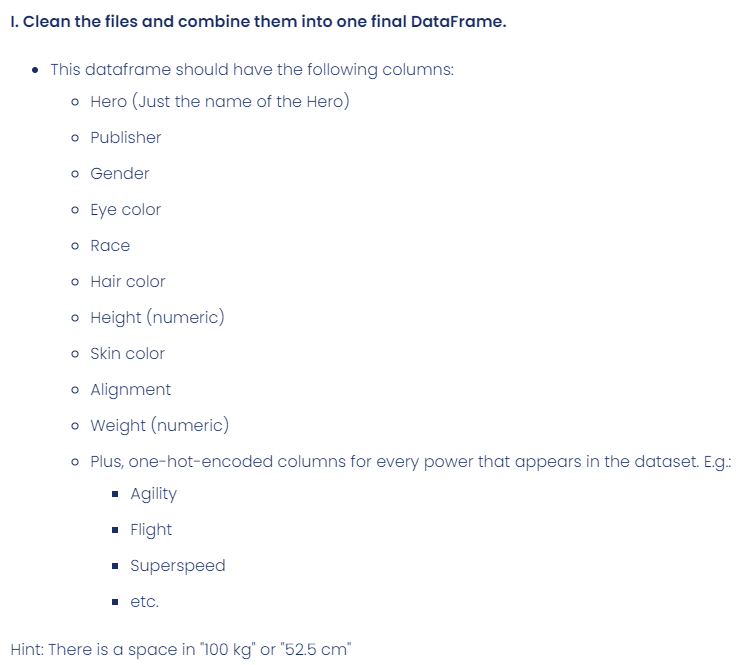
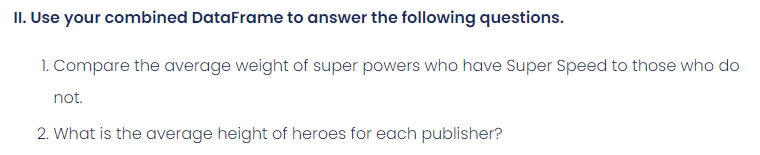

<HR>
    <HR><HR><HR><HR><HR><HR><HR>

In [3]:
data = pd.read_csv("Files/final_results_crab_cakes.csv.gz")
df = data

In [4]:
df

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,D9A33FM394q99o4QtK5YwA,faidleys-seafood-baltimore-3,Faidleys Seafood,https://s3-media3.fl.yelpcdn.com/bphoto/OTjVDC...,False,https://www.yelp.com/biz/faidleys-seafood-balt...,1181,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",4.0,"{'latitude': 39.291696, 'longitude': -76.62224}",['delivery'],$$,"{'address1': '203 N Paca St', 'address2': '', ...",1.410727e+10,(410) 727-4898,1349.560720
1,ieS_5zqxDHcWMCm8BKUYbg,thames-street-oyster-house-baltimore,Thames Street Oyster House,https://s3-media1.fl.yelpcdn.com/bphoto/9hGjo5...,False,https://www.yelp.com/biz/thames-street-oyster-...,2726,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",4.5,"{'latitude': 39.28214, 'longitude': -76.59162}",['delivery'],$$$,"{'address1': '1728 Thames St', 'address2': '',...",1.443450e+10,(443) 449-7726,2090.712792
2,u65W69AhbjUlvJJBkEhGNQ,miss-shirleys-cafe-baltimore-9,Miss Shirley's Cafe,https://s3-media4.fl.yelpcdn.com/bphoto/9FsOyV...,False,https://www.yelp.com/biz/miss-shirleys-cafe-ba...,2918,"[{'alias': 'breakfast_brunch', 'title': 'Break...",4.0,"{'latitude': 39.2870995, 'longitude': -76.6053...","['pickup', 'delivery']",$$,"{'address1': '750 E Pratt St', 'address2': '',...",1.410529e+10,(410) 528-5373,1028.736468
3,6am8TZAFnvND52MOz-Yctg,mamas-on-the-half-shell-baltimore,Mama's On The Half Shell,https://s3-media2.fl.yelpcdn.com/bphoto/HWY8OF...,False,https://www.yelp.com/biz/mamas-on-the-half-she...,1277,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",4.0,"{'latitude': 39.27986, 'longitude': -76.5752399}","['pickup', 'delivery']",$$,"{'address1': '2901 Odonnell St', 'address2': '...",1.410276e+10,(410) 276-3160,3328.825798
4,p_XPpHiZbdOccx2jFUgZJA,the-local-oyster-baltimore,The Local Oyster,https://s3-media3.fl.yelpcdn.com/bphoto/u_33ay...,False,https://www.yelp.com/biz/the-local-oyster-balt...,217,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",4.0,"{'latitude': 39.2958288, 'longitude': -76.6188...",['delivery'],$$,"{'address1': '520 Park Ave', 'address2': None,...",1.844748e+10,(844) 748-2537,966.729941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,BRJ1HbKcfDg7axFWWhUNzA,golden-west-cafe-baltimore-3,Golden West Cafe,https://s3-media2.fl.yelpcdn.com/bphoto/Tq43MA...,False,https://www.yelp.com/biz/golden-west-cafe-balt...,853,"[{'alias': 'cafes', 'title': 'Cafes'}, {'alias...",3.5,"{'latitude': 39.3308895, 'longitude': -76.6340...","['delivery', 'pickup']",$$,"{'address1': '1105 W 36th St', 'address2': '',...",1.410890e+10,(410) 889-8891,4475.257151
425,nA8hY_b-yD4U_PQGWGmw9Q,american-wings-and-pizza-baltimore,American Wings & Pizza,https://s3-media2.fl.yelpcdn.com/bphoto/mYgJ5p...,False,https://www.yelp.com/biz/american-wings-and-pi...,55,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",2.5,"{'latitude': 39.3165, 'longitude': -76.61556}","['delivery', 'pickup']",$,"{'address1': '2400 St Paul St', 'address2': ''...",1.410235e+10,(410) 235-2300,2361.614576
426,WVQqkLAKowuIe51IVNXCZA,outback-steakhouse-baltimore,Outback Steakhouse,https://s3-media2.fl.yelpcdn.com/bphoto/NzwBx9...,False,https://www.yelp.com/biz/outback-steakhouse-ba...,133,"[{'alias': 'steak', 'title': 'Steakhouses'}]",3.0,"{'latitude': 39.2817468, 'longitude': -76.5816...","['delivery', 'pickup']",$$,"{'address1': '2400 Boston St', 'address2': '',...",1.410523e+10,(410) 522-7757,2755.986468
427,rtlLrtUn35c9Y2eIcxHT8g,kings-pizza-and-subs-baltimore-2,King's Pizza & Subs,https://s3-media2.fl.yelpcdn.com/bphoto/9FEdeU...,False,https://www.yelp.com/biz/kings-pizza-and-subs-...,75,"[{'alias': 'pizza', 'title': 'Pizza'}]",2.5,"{'latitude': 39.33086, 'longitude': -76.63161}","['delivery', 'pickup']",$$,"{'address1': '907 W 36th St', 'address2': None...",1.410889e+10,(410) 889-3663,4382.210159


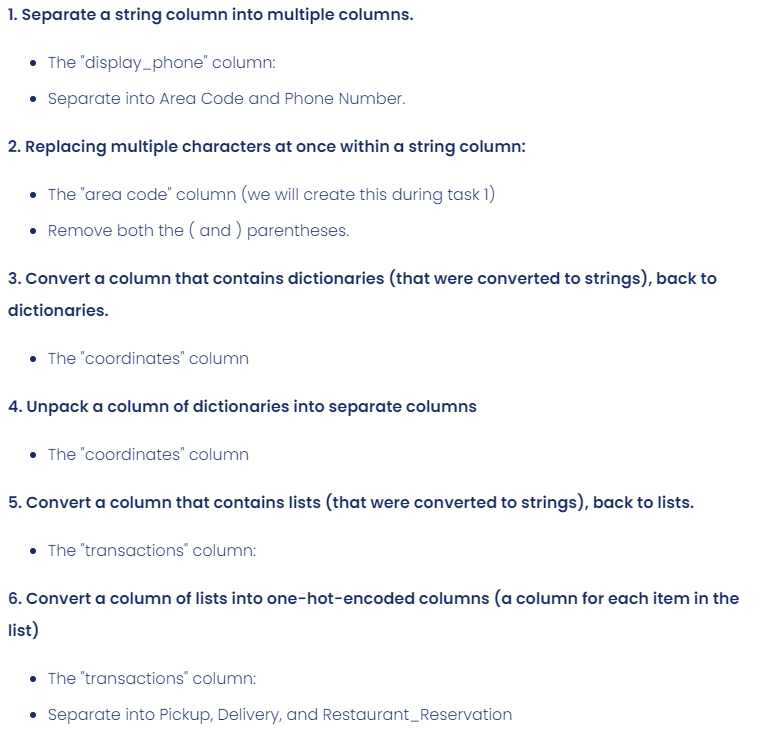

<b>1. Separate a string column into multiple columns

In [5]:
# Exploring existing format with a few examples
df['display_phone'].head(2)

0    (410) 727-4898
1    (443) 449-7726
Name: display_phone, dtype: object

In [9]:
## adding expand=True | If we add expand=True ,pandas will automatically split the column into multiple columns!  (Note, we may not always want this result, but it works for this task)
df['display_phone'].str.split(' ',expand=True)

,0,1
0,(410),727-4898
1,(443),449-7726
2,(410),528-5373
3,(410),276-3160
4,(844),748-2537
...,...,...
424,(410),889-8891
425,(410),235-2300
426,(410),522-7757
427,(410),889-3663


In [10]:
## To save these 2 columns into the dataframe..
df[['area_code','phone_number']] = df['display_phone'].str.split(' ',expand=True)
df.head(2)

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,area_code,phone_number
0,D9A33FM394q99o4QtK5YwA,faidleys-seafood-baltimore-3,Faidleys Seafood,https://s3-media3.fl.yelpcdn.com/bphoto/OTjVDC...,False,https://www.yelp.com/biz/faidleys-seafood-balt...,1181,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",4.0,"{'latitude': 39.291696, 'longitude': -76.62224}",['delivery'],$$,"{'address1': '203 N Paca St', 'address2': '', ...",1.410727e+10,(410) 727-4898,1349.560720,(410),727-4898
1,ieS_5zqxDHcWMCm8BKUYbg,thames-street-oyster-house-baltimore,Thames Street Oyster House,https://s3-media1.fl.yelpcdn.com/bphoto/9hGjo5...,False,https://www.yelp.com/biz/thames-street-oyster-...,2726,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",4.5,"{'latitude': 39.28214, 'longitude': -76.59162}",['delivery'],$$$,"{'address1': '1728 Thames St', 'address2': '',...",1.443450e+10,(443) 449-7726,2090.712792,(443),449-7726


In [11]:
## drop the original column 
df = df.drop(columns=['display_phone', 'phone'])
df.head(2)

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,distance,area_code,phone_number
0,D9A33FM394q99o4QtK5YwA,faidleys-seafood-baltimore-3,Faidleys Seafood,https://s3-media3.fl.yelpcdn.com/bphoto/OTjVDC...,False,https://www.yelp.com/biz/faidleys-seafood-balt...,1181,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",4.0,"{'latitude': 39.291696, 'longitude': -76.62224}",['delivery'],$$,"{'address1': '203 N Paca St', 'address2': '', ...",1349.560720,(410),727-4898
1,ieS_5zqxDHcWMCm8BKUYbg,thames-street-oyster-house-baltimore,Thames Street Oyster House,https://s3-media1.fl.yelpcdn.com/bphoto/9hGjo5...,False,https://www.yelp.com/biz/thames-street-oyster-...,2726,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",4.5,"{'latitude': 39.28214, 'longitude': -76.59162}",['delivery'],$$$,"{'address1': '1728 Thames St', 'address2': '',...",2090.712792,(443),449-7726


<b>2. Replacing multiple characters at once within a string column

<b>HOW TO FIX THIS: "FUTURE WARNING" ERROR

In [12]:
# Make a list of all characters to replace
to_replace = ['(',')']
# run a loop to replace all of the characters in the list at once
for char in to_replace:
    df['area_code'] = df['area_code'].str.replace(char,'')
    
df['area_code'].head()

C:\Users\sugan\AppData\Local\Temp\ipykernel_4568\2843191037.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['area_code'] = df['area_code'].str.replace(char,'')


0    410
1    443
2    410
3    410
4    844
Name: area_code, dtype: object

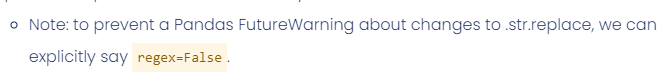

In [13]:
# Make a list of all characters to replace
to_replace = ['(',')']
# run a loop to replace all of the characters in the list at once
for char in to_replace:
    df['area_code'] = df['area_code'].str.replace(char,'',regex=False)
    
df['area_code'].head()

0    410
1    443
2    410
3    410
4    844
Name: area_code, dtype: object

<br><b>3. Converting a string column of dictionaries into actual dictionaries.

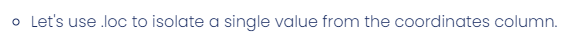

In [14]:
## examining a single value from the coordinates col
coord = df.loc[0,"coordinates"]
print(type(coord))
coord

<class 'str'>


"{'latitude': 39.291696, 'longitude': -76.62224}"

<b>SUGANTHAN'S CORRIDOR: பாசறை

<b>Other Way

In [24]:
df.loc[0,"coordinates"]

"{'latitude': 39.291696, 'longitude': -76.62224}"

In [23]:
# SAME AS
df['coordinates'][0]

"{'latitude': 39.291696, 'longitude': -76.62224}"

<b>My Way

In [22]:
df['coordinates'][[0]]

0    {'latitude': 39.291696, 'longitude': -76.62224}
Name: coordinates, dtype: object

In [25]:
# we can fix our coordinates column with some clever usage of the json.loads function
json.loads(coord)

JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)

In [26]:
# FOR THIS ERROR we can use the .replace method:
coord = coord.replace("'",'"')
coord

'{"latitude": 39.291696, "longitude": -76.62224}'

In [28]:
## now we can use json.loads
fixed_coord = json.loads(coord)
print(type(fixed_coord))
fixed_coord

<class 'dict'>


{'latitude': 39.291696, 'longitude': -76.62224}

In [29]:
## Applying this to the entire column
## use .str.replace to replace all single quotes
df['coordinates'] = df['coordinates'].str.replace("'",'"')
## Apply the json.loads to the full column
df['coordinates'] = df['coordinates'].apply(json.loads)
df['coordinates'].head()

0      {'latitude': 39.291696, 'longitude': -76.62224}
1       {'latitude': 39.28214, 'longitude': -76.59162}
2    {'latitude': 39.2870995, 'longitude': -76.6053...
3     {'latitude': 39.27986, 'longitude': -76.5752399}
4    {'latitude': 39.2958288, 'longitude': -76.6188...
Name: coordinates, dtype: object

In [30]:
## check a single value after transformation
test_coord = df.loc[0, 'coordinates']
print(type(test_coord))
test_coord

<class 'dict'>


{'latitude': 39.291696, 'longitude': -76.62224}

<BR><B>4. Unpack a column of dictionaries into separate columns

In [31]:
# If we use the pandas pd.Series function on our column of dictionaries, it will automatically convert each key to a new column!
lat_long = df['coordinates'].apply(pd.Series)
lat_long

,latitude,longitude
0,39.291696,-76.622240
1,39.282140,-76.591620
2,39.287099,-76.605366
3,39.279860,-76.575240
4,39.295829,-76.618891
...,...,...
424,39.330889,-76.634097
425,39.316500,-76.615560
426,39.281747,-76.581631
427,39.330860,-76.631610


In [38]:
# concat long_lat with original dataframe
df = pd.concat((df, lat_long), axis = 1)
df.head(2)

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,distance,area_code,phone_number,latitude,longitude
0,D9A33FM394q99o4QtK5YwA,faidleys-seafood-baltimore-3,Faidleys Seafood,https://s3-media3.fl.yelpcdn.com/bphoto/OTjVDC...,False,https://www.yelp.com/biz/faidleys-seafood-balt...,1181,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",4.0,"{'latitude': 39.291696, 'longitude': -76.62224}",['delivery'],$$,"{'address1': '203 N Paca St', 'address2': '', ...",1349.560720,410,727-4898,39.291696,-76.62224
1,ieS_5zqxDHcWMCm8BKUYbg,thames-street-oyster-house-baltimore,Thames Street Oyster House,https://s3-media1.fl.yelpcdn.com/bphoto/9hGjo5...,False,https://www.yelp.com/biz/thames-street-oyster-...,2726,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",4.5,"{'latitude': 39.28214, 'longitude': -76.59162}",['delivery'],$$$,"{'address1': '1728 Thames St', 'address2': '',...",2090.712792,443,449-7726,39.282140,-76.59162


In [39]:
df = df.drop(columns=['coordinates'])

<b>5. Convert a column that contains lists (that were converted to strings), back to lists.

In [40]:
## showing the lists are really strings
df.loc[2,'transactions']

"['pickup', 'delivery']"

In [43]:
# We again will have the issue of the single quotes, so we will replace those with double quotes.
# Create a new column where the single quotes are replaced by double quotes
df['transactions_split'] = df['transactions'].str.replace("'",'"')

In [46]:
# check
df.loc[2,'transactions_split']

'["pickup", "delivery"]'

In [47]:
# Apply json.loads to entire column
df['transactions_split'] = df['transactions_split'].apply(json.loads)
# check results
df['transactions_split'].head()

0            [delivery]
1            [delivery]
2    [pickup, delivery]
3    [pickup, delivery]
4            [delivery]
Name: transactions_split, dtype: object

<b>6. Convert a column of lists into one-hot-encoded columns (a column for each item in the list)

In [48]:
# Now, let's check out what this column look like:
df['transactions_split'].value_counts()

[delivery, pickup]                            119
[pickup, delivery]                            107
[delivery]                                    105
[]                                             86
[pickup]                                        6
[pickup, delivery, restaurant_reservation]      2
[delivery, pickup, restaurant_reservation]      2
[restaurant_reservation]                        2
Name: transactions_split, dtype: int64

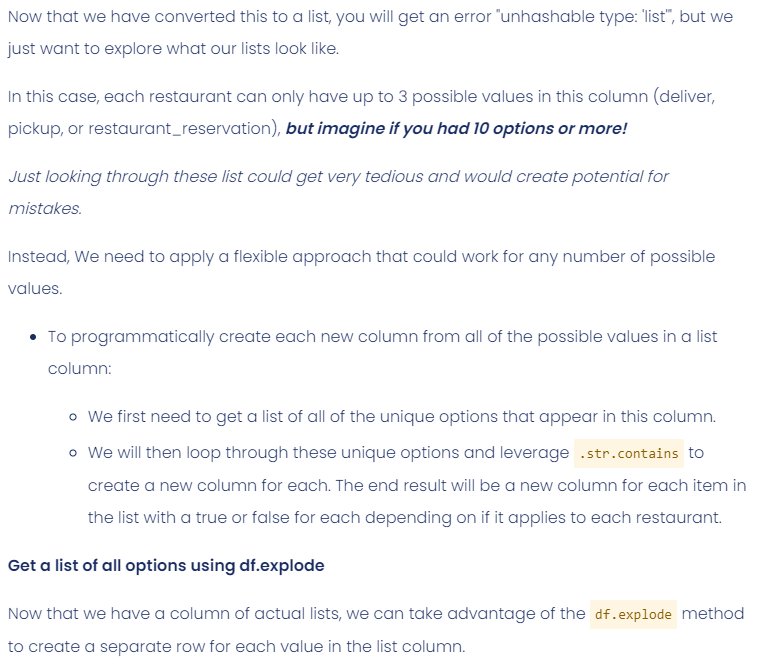

In [63]:
## exploding the column of lists
exploded = df.explode('transactions_split')
exploded
exploded[['name','transactions','transactions_split']].head(5)

,name,transactions,transactions_split
0,Faidleys Seafood,['delivery'],delivery
1,Thames Street Oyster House,['delivery'],delivery
2,Miss Shirley's Cafe,"['pickup', 'delivery']",pickup
2,Miss Shirley's Cafe,"['pickup', 'delivery']",delivery
3,Mama's On The Half Shell,"['pickup', 'delivery']",pickup


In [58]:
# my code
exploded['transactions_split'].value_counts()

delivery                  335
pickup                    236
restaurant_reservation      6
Name: transactions_split, dtype: int64

In [59]:
exploded['transactions_split'].unique()

array(['delivery', 'pickup', nan, 'restaurant_reservation'], dtype=object)

In [64]:
# Now we will take the .unique values from this exploded column as our list of columns to create from our original non-exploded dataframe.
# Importantly, we do not want to save NaN to our list so we can use .dropna() right before our .unique()
## saving the unique values from the exploded column
cols_to_make = exploded['transactions_split'].dropna().unique()
cols_to_make

array(['delivery', 'pickup', 'restaurant_reservation'], dtype=object)

In [62]:
cols_to_make

[delivery, pickup]                            119
[pickup, delivery]                            107
[delivery]                                    105
[]                                             86
[pickup]                                        6
[pickup, delivery, restaurant_reservation]      2
[delivery, pickup, restaurant_reservation]      2
[restaurant_reservation]                        2
Name: transactions_split, dtype: int64

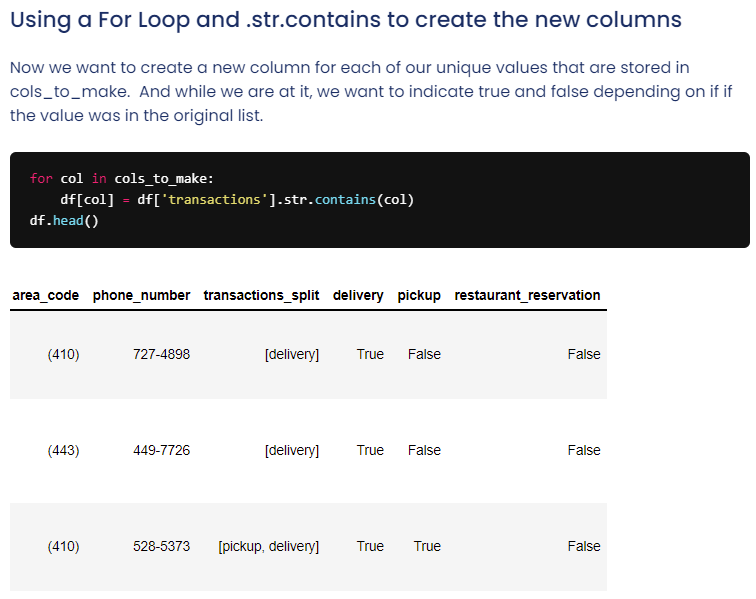

In [65]:
# Using a For Loop and .str.contains to create the new columns
for col in cols_to_make:
    df[col] = df['transactions'].str.contains(col)
df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,...,location,distance,area_code,phone_number,latitude,longitude,transactions_split,delivery,pickup,restaurant_reservation
0,D9A33FM394q99o4QtK5YwA,faidleys-seafood-baltimore-3,Faidleys Seafood,https://s3-media3.fl.yelpcdn.com/bphoto/OTjVDC...,False,https://www.yelp.com/biz/faidleys-seafood-balt...,1181,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",4.0,['delivery'],...,"{'address1': '203 N Paca St', 'address2': '', ...",1349.560720,410,727-4898,39.291696,-76.622240,[delivery],True,False,False
1,ieS_5zqxDHcWMCm8BKUYbg,thames-street-oyster-house-baltimore,Thames Street Oyster House,https://s3-media1.fl.yelpcdn.com/bphoto/9hGjo5...,False,https://www.yelp.com/biz/thames-street-oyster-...,2726,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",4.5,['delivery'],...,"{'address1': '1728 Thames St', 'address2': '',...",2090.712792,443,449-7726,39.282140,-76.591620,[delivery],True,False,False
2,u65W69AhbjUlvJJBkEhGNQ,miss-shirleys-cafe-baltimore-9,Miss Shirley's Cafe,https://s3-media4.fl.yelpcdn.com/bphoto/9FsOyV...,False,https://www.yelp.com/biz/miss-shirleys-cafe-ba...,2918,"[{'alias': 'breakfast_brunch', 'title': 'Break...",4.0,"['pickup', 'delivery']",...,"{'address1': '750 E Pratt St', 'address2': '',...",1028.736468,410,528-5373,39.287099,-76.605366,"[pickup, delivery]",True,True,False
3,6am8TZAFnvND52MOz-Yctg,mamas-on-the-half-shell-baltimore,Mama's On The Half Shell,https://s3-media2.fl.yelpcdn.com/bphoto/HWY8OF...,False,https://www.yelp.com/biz/mamas-on-the-half-she...,1277,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",4.0,"['pickup', 'delivery']",...,"{'address1': '2901 Odonnell St', 'address2': '...",3328.825798,410,276-3160,39.279860,-76.575240,"[pickup, delivery]",True,True,False
4,p_XPpHiZbdOccx2jFUgZJA,the-local-oyster-baltimore,The Local Oyster,https://s3-media3.fl.yelpcdn.com/bphoto/u_33ay...,False,https://www.yelp.com/biz/the-local-oyster-balt...,217,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",4.0,['delivery'],...,"{'address1': '520 Park Ave', 'address2': None,...",966.729941,844,748-2537,39.295829,-76.618891,[delivery],True,False,False


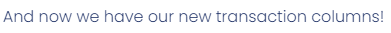
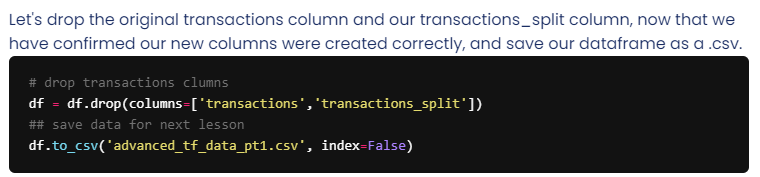

In [ ]:
# Now let's drop the original transactions column and our transactions_split column, now that we have confirmed our new columns were created correctly, and save our dataframe as a .csv.
# drop transactions clumns
df = df.drop(columns=['transactions','transactions_split'])

In [68]:
## save data for next lesson
df.to_csv('Data/advanced_tf_data_pt1.csv', index=False)

<b>CONTINUE

In [69]:
df = pd.read_csv('Data/advanced_tf_data_pt1.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      429 non-null    object 
 1   alias                   429 non-null    object 
 2   name                    429 non-null    object 
 3   image_url               420 non-null    object 
 4   is_closed               429 non-null    bool   
 5   url                     429 non-null    object 
 6   review_count            429 non-null    int64  
 7   categories              429 non-null    object 
 8   rating                  429 non-null    float64
 9   price                   339 non-null    object 
 10  location                429 non-null    object 
 11  distance                429 non-null    float64
 12  area_code               413 non-null    float64
 13  phone_number            413 non-null    object 
 14  latitude                429 non-null    fl

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,price,location,distance,area_code,phone_number,latitude,longitude,delivery,pickup,restaurant_reservation
0,D9A33FM394q99o4QtK5YwA,faidleys-seafood-baltimore-3,Faidleys Seafood,https://s3-media3.fl.yelpcdn.com/bphoto/OTjVDC...,False,https://www.yelp.com/biz/faidleys-seafood-balt...,1181,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",4.0,$$,"{'address1': '203 N Paca St', 'address2': '', ...",1349.560720,410.0,727-4898,39.291696,-76.622240,True,False,False
1,ieS_5zqxDHcWMCm8BKUYbg,thames-street-oyster-house-baltimore,Thames Street Oyster House,https://s3-media1.fl.yelpcdn.com/bphoto/9hGjo5...,False,https://www.yelp.com/biz/thames-street-oyster-...,2726,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",4.5,$$$,"{'address1': '1728 Thames St', 'address2': '',...",2090.712792,443.0,449-7726,39.282140,-76.591620,True,False,False
2,u65W69AhbjUlvJJBkEhGNQ,miss-shirleys-cafe-baltimore-9,Miss Shirley's Cafe,https://s3-media4.fl.yelpcdn.com/bphoto/9FsOyV...,False,https://www.yelp.com/biz/miss-shirleys-cafe-ba...,2918,"[{'alias': 'breakfast_brunch', 'title': 'Break...",4.0,$$,"{'address1': '750 E Pratt St', 'address2': '',...",1028.736468,410.0,528-5373,39.287099,-76.605366,True,True,False
3,6am8TZAFnvND52MOz-Yctg,mamas-on-the-half-shell-baltimore,Mama's On The Half Shell,https://s3-media2.fl.yelpcdn.com/bphoto/HWY8OF...,False,https://www.yelp.com/biz/mamas-on-the-half-she...,1277,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",4.0,$$,"{'address1': '2901 Odonnell St', 'address2': '...",3328.825798,410.0,276-3160,39.279860,-76.575240,True,True,False
4,p_XPpHiZbdOccx2jFUgZJA,the-local-oyster-baltimore,The Local Oyster,https://s3-media3.fl.yelpcdn.com/bphoto/u_33ay...,False,https://www.yelp.com/biz/the-local-oyster-balt...,217,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",4.0,$$,"{'address1': '520 Park Ave', 'address2': None,...",966.729941,844.0,748-2537,39.295829,-76.618891,True,False,False


In [70]:
# Replacing String Ids with Integers
#First, save the unique ids (and consider sorting them alphabetically with the sorted function)
unique_ids = sorted(df['id'].unique())
unique_ids[:3]

['-CGGHN0TJHr3FW7Kdt0K2g', '-QNqenvxWiBAaJdhhTB04Q', '-pVulrA2NbgQUNS_jDjEqA']

In [71]:
unique_ids

['-CGGHN0TJHr3FW7Kdt0K2g',
 '-QNqenvxWiBAaJdhhTB04Q',
 '-pVulrA2NbgQUNS_jDjEqA',
 '04boSlm1rZyGJlUebo0SxA',
 '0HAy_fw3WrsiG_5lRVObTw',
 '0_mX70KNZZXOUna_dxSgIA',
 '0l5vNvQtvVTXEpUYyDkaVw',
 '0rjYkCWD4TiyYcbelalcig',
 '19NqOlADe8wHXWtx5sWRtQ',
 '1C8QSqc-erkkyAUywh501A',
 '1EH88Idp4v2pWorFt2U4Cw',
 '1NSAo5aoGkwqUFb67K0Muw',
 '1n30b0G2weApQ4oEfPMWIA',
 '1qLU9YdoQBoF8fK4K7GYxQ',
 '1xHs6aH0ZFRF27F1JYLrYw',
 '1xQWV-Elkm80dDYGzTdhWg',
 '2BKIPMgzbQnH2bMYpDamVg',
 '2EZQSpT0WQf1_KOEg1lEfw',
 '2Hr1RarrQXwRyBElL9AFzw',
 '2TflLhaGZEAfFhFU3R4i-w',
 '2dIy9KQlWc8BdKMpmuwn6Q',
 '32kPGuT26Vzq_i2GWOgbyw',
 '3BdaxqMsmN26GujaArci8A',
 '3MIe3BlV4HgIAchZVVPPxA',
 '3RtD9VadLIF_mYkgnFwIew',
 '3tyOZK3p2usVOWDgGWXSCg',
 '43tCUdPOjuVELQbCdWddyg',
 '47Q2Xv30J9lu16UHnRmYvA',
 '4QrEtrKk8A2o1CclzKcKqg',
 '4iTgpJ8Fri5-IOlmF65nsw',
 '4zPM8esvWlTS0TWPhzVpHQ',
 '4zyGvuJbj00igVPaL0Yqyg',
 '5AzN8ZJZDGa7AgqaSdnK0g',
 '5DfBR-xCT46SdrO-9RETig',
 '5jv3znLBIdiZjzUaurOU-w',
 '5m1TbMkbxiQgjWK1Mgsv0g',
 '5rYJkTY_V5y5IGepcDmW_w',
 

In [72]:
# Next, generate a range of from 0 to the length of the unique ids
## make integers for each id
int_ids = range(len(unique_ids))
int_ids

range(0, 429)

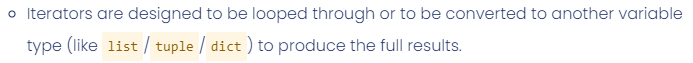

In [75]:
# Note: the range function also creates an iterator, which is why we see range(0, 429) in the example above instead of the actual integers.
# If we convert the range to a list, we can see all of the integers in our range.
# Converting our range to a list and showing the first 10 values
example_range = list(int_ids)
example_range[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [76]:
## THIS IS THE 'MAPPER DICTIONARY'
# Zip together the unique_ids as the keys and the int_ids as the values
id_map = dict(zip(unique_ids,int_ids))
id_map

{'-CGGHN0TJHr3FW7Kdt0K2g': 0,
 '-QNqenvxWiBAaJdhhTB04Q': 1,
 '-pVulrA2NbgQUNS_jDjEqA': 2,
 '04boSlm1rZyGJlUebo0SxA': 3,
 '0HAy_fw3WrsiG_5lRVObTw': 4,
 '0_mX70KNZZXOUna_dxSgIA': 5,
 '0l5vNvQtvVTXEpUYyDkaVw': 6,
 '0rjYkCWD4TiyYcbelalcig': 7,
 '19NqOlADe8wHXWtx5sWRtQ': 8,
 '1C8QSqc-erkkyAUywh501A': 9,
 '1EH88Idp4v2pWorFt2U4Cw': 10,
 '1NSAo5aoGkwqUFb67K0Muw': 11,
 '1n30b0G2weApQ4oEfPMWIA': 12,
 '1qLU9YdoQBoF8fK4K7GYxQ': 13,
 '1xHs6aH0ZFRF27F1JYLrYw': 14,
 '1xQWV-Elkm80dDYGzTdhWg': 15,
 '2BKIPMgzbQnH2bMYpDamVg': 16,
 '2EZQSpT0WQf1_KOEg1lEfw': 17,
 '2Hr1RarrQXwRyBElL9AFzw': 18,
 '2TflLhaGZEAfFhFU3R4i-w': 19,
 '2dIy9KQlWc8BdKMpmuwn6Q': 20,
 '32kPGuT26Vzq_i2GWOgbyw': 21,
 '3BdaxqMsmN26GujaArci8A': 22,
 '3MIe3BlV4HgIAchZVVPPxA': 23,
 '3RtD9VadLIF_mYkgnFwIew': 24,
 '3tyOZK3p2usVOWDgGWXSCg': 25,
 '43tCUdPOjuVELQbCdWddyg': 26,
 '47Q2Xv30J9lu16UHnRmYvA': 27,
 '4QrEtrKk8A2o1CclzKcKqg': 28,
 '4iTgpJ8Fri5-IOlmF65nsw': 29,
 '4zPM8esvWlTS0TWPhzVpHQ': 30,
 '4zyGvuJbj00igVPaL0Yqyg': 31,
 '5AzN8ZJZDGa7Agqa

In [80]:
## EXAMPLE
## Using our Mapper Dictionary to Replace Ids
# Now that we have our mapper dictionary, we slice out the integer_ids that corresponds to a text id.
## demonstrating using id_map to get iteger id 
example_str_id ="D9A33FM394q99o4QtK5YwA"
id_map[example_str_id]

99

In [77]:
# We can use pandas's .map (or .replace) to lookup the new integer ids to use instead of the string ids.
df['id'].map(id_map)

0       99
1      325
2      400
3       42
4      370
      ... 
424     85
425    354
426    236
427    384
428    112
Name: id, Length: 429, dtype: int64

In [85]:
## overwriting the original id column 
df['id'] = df['id'].replace(id_map)
df.head(3)

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,price,location,distance,area_code,phone_number,latitude,longitude,delivery,pickup,restaurant_reservation
0,99,faidleys-seafood-baltimore-3,Faidleys Seafood,https://s3-media3.fl.yelpcdn.com/bphoto/OTjVDC...,False,https://www.yelp.com/biz/faidleys-seafood-balt...,1181,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",4.0,$$,"{'address1': '203 N Paca St', 'address2': '', ...",1349.560720,410.0,727-4898,39.291696,-76.622240,True,False,False
1,325,thames-street-oyster-house-baltimore,Thames Street Oyster House,https://s3-media1.fl.yelpcdn.com/bphoto/9hGjo5...,False,https://www.yelp.com/biz/thames-street-oyster-...,2726,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",4.5,$$$,"{'address1': '1728 Thames St', 'address2': '',...",2090.712792,443.0,449-7726,39.282140,-76.591620,True,False,False
2,400,miss-shirleys-cafe-baltimore-9,Miss Shirley's Cafe,https://s3-media4.fl.yelpcdn.com/bphoto/9FsOyV...,False,https://www.yelp.com/biz/miss-shirleys-cafe-ba...,2918,"[{'alias': 'breakfast_brunch', 'title': 'Break...",4.0,$$,"{'address1': '750 E Pratt St', 'address2': '',...",1028.736468,410.0,528-5373,39.287099,-76.605366,True,True,False


In [119]:
## SAVING A NEW LOOKUP TABLE WITH THE ORIGINAL STRING IDS
# Using pd.DataFrame and a dictionary
id_lookup = pd.DataFrame({'str_id': id_map.keys(),
                         'int_id':id_map.values()})
id_lookup.head(3)

,str_id,int_id
0,-CGGHN0TJHr3FW7Kdt0K2g,0
1,-QNqenvxWiBAaJdhhTB04Q,1
2,-pVulrA2NbgQUNS_jDjEqA,2


In [ ]:
;## MERGE IS SAME AS SQL JOIN
## Merging with the same column name
## SYNTAX
pd.merge(left_df,right_df, on='id')
## ## merging with different column names
## SYNTAX
pd.merge(left_df, right_df, left_on='id', right_on='index')

In [120]:
## EXAMPLE merge with our 2 dataframes
merged = pd.merge(df, id_lookup, left_on='id', right_on='int_id', how='inner')
merged.head(3)

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,price,...,distance,area_code,phone_number,latitude,longitude,delivery,pickup,restaurant_reservation,str_id,int_id
0,99,faidleys-seafood-baltimore-3,Faidleys Seafood,https://s3-media3.fl.yelpcdn.com/bphoto/OTjVDC...,False,https://www.yelp.com/biz/faidleys-seafood-balt...,1181,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",4.0,$$,...,1349.560720,410.0,727-4898,39.291696,-76.622240,True,False,False,D9A33FM394q99o4QtK5YwA,99
1,325,thames-street-oyster-house-baltimore,Thames Street Oyster House,https://s3-media1.fl.yelpcdn.com/bphoto/9hGjo5...,False,https://www.yelp.com/biz/thames-street-oyster-...,2726,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",4.5,$$$,...,2090.712792,443.0,449-7726,39.282140,-76.591620,True,False,False,ieS_5zqxDHcWMCm8BKUYbg,325
2,400,miss-shirleys-cafe-baltimore-9,Miss Shirley's Cafe,https://s3-media4.fl.yelpcdn.com/bphoto/9FsOyV...,False,https://www.yelp.com/biz/miss-shirleys-cafe-ba...,2918,"[{'alias': 'breakfast_brunch', 'title': 'Break...",4.0,$$,...,1028.736468,410.0,528-5373,39.287099,-76.605366,True,True,False,u65W69AhbjUlvJJBkEhGNQ,400


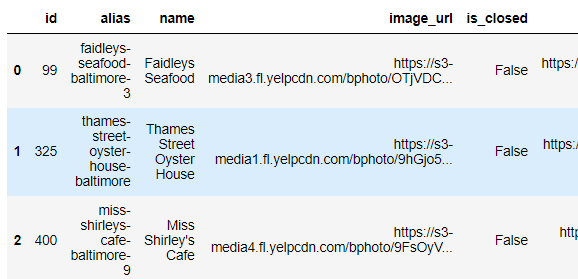
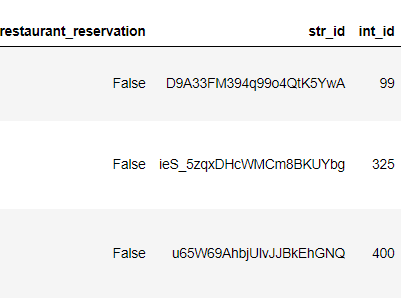

In [121]:
print("sadfsaf".upper())

SADFSAF
